In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1.read the dataset to python environment

In [2]:
data = pd.read_excel(r'C:\Users\Preethy\Downloads\iris1data.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [ ]:
#2.do the necessary pre-processing steps

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
for i in['SL','SW','PL']:
     data[i]=data[i].fillna(data[i].median())

In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
data['Classification'].nunique()

3

In [9]:
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
data['Classification']= label_encoder.fit_transform(data['Classification'])

In [12]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [13]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [ ]:
#3.find out which classification model gives the best result(also d rando forest algorithm)

In [14]:
y= data['Classification']
x= data.drop('Classification',axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()
logit_model=lr.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\Preethy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
metric_k=[]# empty list
neighbors = range(3,18)#it will take values from 3 to 17

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(x_train,y_train)
    y_pred_KNN = classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

In [25]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

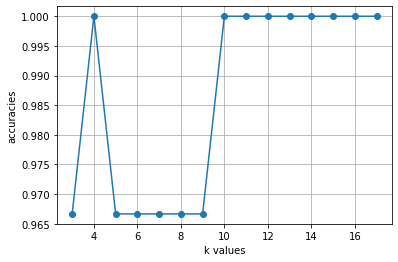

In [26]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [27]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier = classifier.fit(x_train,y_train)
y_pred_KNN = classifier.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred_KNN)

1.0

In [29]:
#svm

In [30]:
from sklearn.svm import SVC

In [31]:
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred_svm)

1.0

In [35]:
clf_svm2 = SVC(kernel='rbf')
clf_svm2 = clf_svm2.fit(x_train,y_train)
y_pred_svm2 = clf_svm2.predict(x_test)

In [36]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_svm2)

1.0

In [38]:
#decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred_dt)

1.0

In [ ]:
#random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_clf = RandomForestClassifier()
rf_clf= rf_clf.fit(x_train,y_train)
y_pred_clf=rf_clf.predict(x_test)

In [45]:
confusion_matrix(y_test,y_pred_clf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred_clf)

1.0

In [ ]:
# here all the classification models ie KNN,SVM,Logistic regression,decision tree,random forest has given accuracy score 1 which means that all of the trained models were able to clasify the iris plant species correctly